## Word2Vec vs FastText?
- **Word2Vec** treats each word in corpus as an atomic entity and generates a vector for each word.
- **FastText** treats each word as a component of character n-grams = sum of character n-gram

    ex) “apple” = a sum of the vectors of the n-grams “<ap”, “app”, ”appl”, ”apple”, ”apple>”, “ppl”, “pple”, ”pple>”, “ple”, ”ple>”
  
 *If you would like to know more, go through this [link](https://www.quora.com/What-is-the-main-difference-between-word2vec-and-fastText)!*

### 1. pre-trained FastText
They have pre-trained word vectors for 294 languages, trained on Wikipedia using FastText.
> https://github.com/facebookresearch/fastText/blob/master/docs/pretrained-vectors.md

In [1]:
from __future__ import print_function
from gensim.models import KeyedVectors

#creating the model
ko_model = KeyedVectors.load_word2vec_format('wiki.ko.vec')

In [2]:
#getting the tokens
words = []
for word in ko_model.vocab:
    words.append(word)
    
#the total number of tokens
print("# of tokens : {}".format(len(words)))

#the dimension of a word vector
print("Dimension of a word vector: {}".format(len(ko_model[word[0]])))

#the vector of a word
print("vector components of a word : {}".format(ko_model[word[0]]))

# of tokens : 879129
Dimension of a word vector: 300
vector components of a word : [-0.32184    0.54846   -1.0208    -0.048752  -0.22877   -0.029109
  0.021888  -0.1674    -0.21267    0.22746   -0.02506    0.18203
 -0.019068   0.27718   -0.28098   -0.0038997  0.028645   0.34712
 -0.15245   -0.20516    0.19587   -0.012547   0.090326  -0.32227
 -0.068956   0.089779   0.12269    0.39683   -0.19468    0.73036
 -0.16096    0.033482  -0.13482   -0.26622   -0.27938   -0.33161
 -0.19468   -0.081854  -0.26334   -0.12199   -0.17464    0.21967
  0.53648    0.042376   0.17449   -0.44221    0.16403   -0.10101
  0.3519    -0.45333    0.24374    0.23487    0.069466  -0.2439
  0.08941   -0.12421   -0.2672    -0.11752   -0.2772    -0.47857
  0.023945   0.31361    0.29779   -0.32235    0.014144  -0.15962
 -0.12692    0.13397   -0.2002     0.094797   0.39331   -0.0046058
 -0.040946  -0.11802   -0.24577    0.20872   -0.13904    0.26253
 -0.46157    0.014196  -0.081839   0.38737    0.1862     0.089477
 -0.

In [3]:
words[50]

'가'

In [4]:
#examine the words in fasttext
for word in words[:50]:
    print(word)

</s>
.
,
)
(
년
'
-
분류
월
일
#
}
있다
/
~
이
《
》
는
수
제
의
넘겨주기
은
·
있는
그
역
kst
대한민국의
\
에
토론
선수
바깥
고리
%
한
및
를
?
축구
한다
the
대한
영화
a
을
주


In [5]:
#pick your magic word
find_similar_to = '사랑'

#find similar word[default = top 10]
for similar_word in ko_model.similar_by_word(find_similar_to):
    print("Word: {0}, Similarity: {1:.2f}".format(similar_word[0], similar_word[1]))

Word: 사랑사랑, Similarity: 0.81
Word: 사랑치, Similarity: 0.78
Word: 사랑일, Similarity: 0.77
Word: 사랑느낌, Similarity: 0.76
Word: 사랑이었네, Similarity: 0.76
Word: 사랑이여, Similarity: 0.75
Word: 사랑병, Similarity: 0.75
Word: 사랑인, Similarity: 0.75
Word: 사랑맛, Similarity: 0.75
Word: 사랑노래, Similarity: 0.74


In [6]:
#test words1
word_add = ['동물', '파충류']
word_sub = ['뱀']

#word vector calculation
for result_word in ko_model.most_similar(positive=word_add, negative=word_sub):
    print("word : {0}, similarity : {1:.2f}".format(result_word[0],result_word[1]))

word : 포유류, similarity : 0.72
word : 포유동물, similarity : 0.71
word : 절지동물, similarity : 0.69
word : 양서류, similarity : 0.69
word : 독동물, similarity : 0.69
word : 포유류분류, similarity : 0.68
word : 무척추동물, similarity : 0.68
word : 척추동물분류, similarity : 0.68
word : 도시동물, similarity : 0.68
word : 동물상, similarity : 0.67


In [8]:
#test words2
word_match = ['아침', '점심', '저녁', '된장국']
print(ko_model.doesnt_match(word_match))

#test words3
print(ko_model.similarity('컴퓨터', '인간'))

#test words4
print(ko_model.similarity('사랑해', '사랑합니다'))

된장국
0.42482013
0.6510483


### 2. Self-trained FastText by Gensim
> https://radimrehurek.com/gensim/models/fasttext.html

In [32]:
from gensim.test.utils import common_texts
from gensim.models import FastText
from gensim.models import Word2Vec

ft_model = FastText(common_texts, size=4, window=3, min_count=1)
#if your willing to train a model with your own data, use the code below
#corpus_file = datapath('lee_background.cor')
#ft_model.build_vocab(corpus_file=corpus_file)
#total_words = ft_model.corpus_total_words
#ft_model.train(corpus_file=cour, total_words=total_words, epochs=5)

In [33]:
common_texts[:100]

similarities = ft_model.wv.most_similar(positive=['computer', 'human'], negative=['interface'])
print(similarities)

[('graph', 0.8333591818809509), ('system', 0.49392634630203247), ('user', 0.3329693675041199), ('trees', 0.22027269005775452), ('response', 0.007395058870315552), ('eps', -0.0833044946193695), ('survey', -0.11669595539569855), ('time', -0.17677493393421173), ('minors', -0.9261970520019531)]


### Word2Vec vs FastText?
Most importantly, FastText can generate better word embeddings for rare words.
Let's take a look with actual examples!

In case of Word2Vec,

In [35]:
wv_model = Word2Vec(common_texts, size=4, window=3, min_count=1)
a=wv_model.wv.most_similar("electrofishing")

KeyError: "word 'electrofishing' not in vocabulary"

In [36]:
#since I don't have any proper vocabulary list, I will just comment the below.
#ft_model.wv.most_similar("electrofishing")

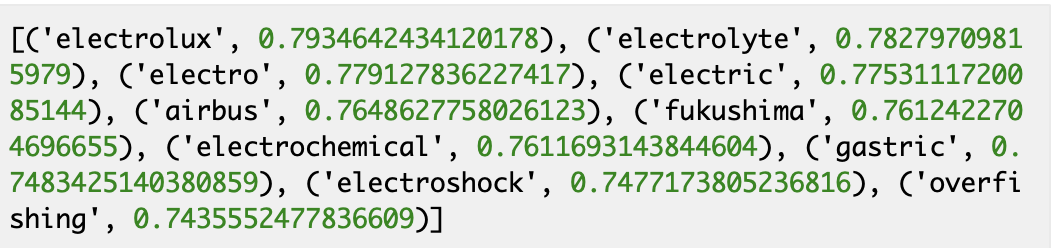